** 0. MNIST with softmax and 2 layer shallow CNN **

In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
print("train: ", mnist.train.images.shape, mnist.train.labels.shape)
print("validation: ", mnist.validation.images.shape, mnist.validation.labels.shape)
print("test: ", mnist.test.images.shape, mnist.test.labels.shape)

train:  (55000, 784) (55000, 10)
validation:  (5000, 784) (5000, 10)
test:  (10000, 784) (10000, 10)


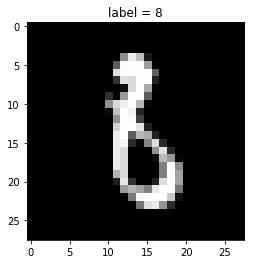

In [14]:
image_array = mnist.train.images[42,:].reshape(28, -1)
label = np.argmax(mnist.train.labels[42])

plt.imshow(image_array, cmap = "gray")
plt.title("label = " + str(label)) 
plt.show()

*** softmax ***

In [20]:
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros((784, 10)))
b = tf.Variable(tf.zeros((10)))

y = tf.nn.softmax(tf.matmul(x, W) + b)
y_ = tf.placeholder(tf.float32, [None, 10])

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y)))

In [21]:
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [22]:
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict = {x: batch_xs, y_ : batch_ys})

In [23]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("softmax accuracy: %f" % sess.run(accuracy, feed_dict = {x:mnist.test.images, y_ : mnist.test.labels}))


softmax accuracy: 0.916900


*** 2 layer shallow CNN ***

In [24]:
x_image = tf.reshape(x, [-1, 28, 28, 1])


In [25]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev = 0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape = shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides = [1, 1, 1, 1], padding = "SAME")

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = "SAME")


In [26]:
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)


W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)


W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7 * 7 * 64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob) 


W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y_conv, labels = y_))

train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))





In [ ]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

for i in range(1000):
    batch = mnist.train.next_batch(50)
    if i % 100 == 0:
        train_accuracy = accuracy.eval(feed_dict = {x: batch[0], y_ : batch[1], keep_prob : 1.0})
        print("step %d, training accuracy: %g" % (i, train_accuracy))
        
    train_step.run(feed_dict = {x:batch[0], y_: batch[1], keep_prob: 0.5})
    
    
print("test accuracy %g" % accuracy.eval(feed_dict = {x:mnist.test.images, y_ :mnist.test.labels, keep_prob : 1.0}))
        
        

step 0, training accuracy: 0.08
step 100, training accuracy: 0.8
step 200, training accuracy: 0.94
step 300, training accuracy: 0.92
step 400, training accuracy: 0.94
step 500, training accuracy: 0.92
step 600, training accuracy: 0.96
step 700, training accuracy: 0.94
step 800, training accuracy: 0.94
step 900, training accuracy: 0.96
